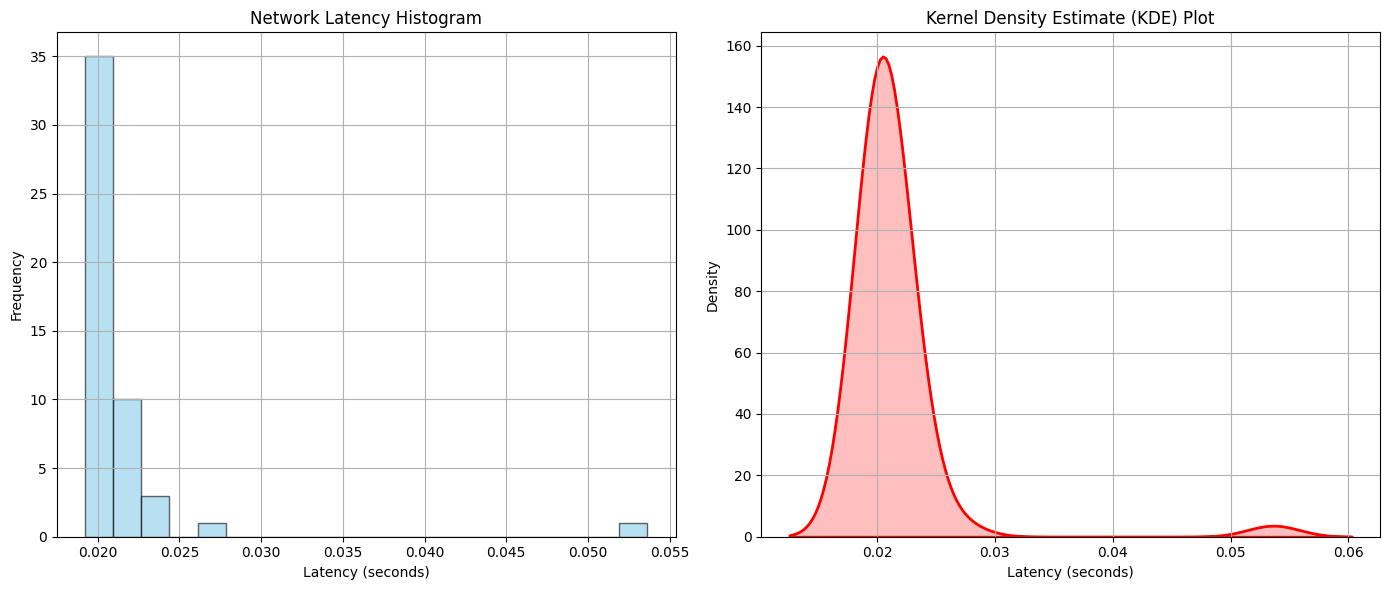

In [37]:
import ping3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Function to measure network latency (ping to a host)
def _measure_network_latency(host: str = "8.8.8.8") -> float:
    """
    Measures network latency by sending a ping to a given host.
    
    Args:
        host (str): The IP address or hostname to ping (default is Google's public DNS).
    
    Returns:
        float: The round-trip time (RTT) in seconds. Returns None if the ping fails.
    """
    try:
        # Send a single ping to the host and get the round-trip time in seconds
        rtt = ping3.ping(host, timeout=2)  # Timeout is set to 2 seconds
        if rtt is None:
            return float('inf')  # Return a high value if ping fails
        return rtt  # Return round-trip time in seconds
    except ping3.errors.PingError as e:
        return float('inf')  # Return a high value if ping fails


# Function to collect latency data
def collect_latency_data(host: str = "8.8.8.8", num_samples: int = 100) -> list:
    """
    Collects network latency data by pinging a host multiple times.
    
    Args:
        host (str): The host to ping (default is Google's public DNS).
        num_samples (int): Number of pings to collect.
    
    Returns:
        list: A list of latency measurements in seconds.
    """
    latencies = []
    for _ in range(num_samples):
        latency = _measure_network_latency(host)
        latencies.append(latency)
        time.sleep(0.1)  # Small delay to avoid overwhelming the network
    return latencies

# Function to plot latency histogram and KDE plot in separate graphs
def plot_latency_histogram_and_kde(latencies: list) -> None:
    """
    Plots a histogram and a Kernel Density Estimate (KDE) plot of network latency measurements in separate graphs.
    
    Args:
        latencies (list): List of latency measurements to plot.
    """
    # Filter out "inf" values (failed pings)
    latencies = [lat for lat in latencies if lat != float('inf')]

    # Create two subplots: one for the histogram and one for the KDE
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogram plot
    axes[0].hist(latencies, bins=20, color='skyblue', edgecolor='black', alpha=0.6)
    axes[0].set_title("Network Latency Histogram")
    axes[0].set_xlabel("Latency (seconds)")
    axes[0].set_ylabel("Frequency")
    axes[0].grid(True)

    # KDE plot
    sns.kdeplot(latencies, color='red', lw=2, ax=axes[1], fill=True)
    axes[1].set_title("Kernel Density Estimate (KDE) Plot")
    axes[1].set_xlabel("Latency (seconds)")
    axes[1].set_ylabel("Density")
    axes[1].grid(True)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


# Collect latency data
latencies = collect_latency_data(host="8.8.8.8", num_samples=50)

# Plot the histogram
plot_latency_histogram_and_kde(latencies)



In [35]:
min(latencies)

-111.56753826141357

In [24]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install ping3

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
